In [1]:
from src.datasets.CelebA_dataset import CelebADataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
celeba_dataset = CelebADataset(input_shape=(128,128))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Target: Smiling
Protected feature: Male


In [4]:
train_dataset, valid_dataset, test_dataset = celeba_dataset.get_datasets()

In [5]:
train_dataset[0]

(tensor([[[ 0.9843,  0.9843,  0.9843,  ...,  0.9843,  0.9608,  0.9922],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9922,  0.9765,  1.0000],
          [ 0.9843,  0.9843,  0.9843,  ...,  0.9608,  0.9843,  0.9922],
          ...,
          [ 0.3961,  0.3098,  0.1216,  ..., -0.2078, -0.2392, -0.2471],
          [ 0.0902,  0.0667,  0.2314,  ..., -0.0745, -0.0745, -0.0902],
          [ 0.2471,  0.5137,  0.7098,  ..., -0.0745, -0.0667, -0.0588]],
 
         [[ 0.8118,  0.8118,  0.8118,  ...,  0.8431,  0.8196,  0.8667],
          [ 0.8118,  0.8118,  0.8118,  ...,  0.8588,  0.8431,  0.8745],
          [ 0.8118,  0.8118,  0.8118,  ...,  0.8353,  0.8588,  0.8667],
          ...,
          [-0.1216, -0.2157, -0.4039,  ..., -0.7098, -0.7333, -0.7412],
          [-0.4353, -0.4588, -0.3176,  ..., -0.6078, -0.6078, -0.6078],
          [-0.2863, -0.0196,  0.1608,  ..., -0.6157, -0.6157, -0.6000]],
 
         [[ 0.5216,  0.5216,  0.5216,  ...,  0.6706,  0.7176,  0.7412],
          [ 0.5216,  0.5216,

In [6]:
print(len(train_dataset))
print(len(valid_dataset))
print(len(test_dataset))

162770
19867
19962


In [7]:
#dataframe = train_dataset.get_dataframe()
#dataframe.head(15)

In [8]:
dataframe = pd.read_csv('celeba_train_dataframe.csv')
dataframe =  dataframe.drop(columns=[col for col in dataframe.columns if 'Unnamed' in col])

In [9]:
dataframe.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


/var/folders/fv/hdmdsw6s3fv_72w1tfp22w9m0000gn/T/ipykernel_53381/2621885695.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format((x / total_count) * 100) for x in plt.gca().get_yticks()])


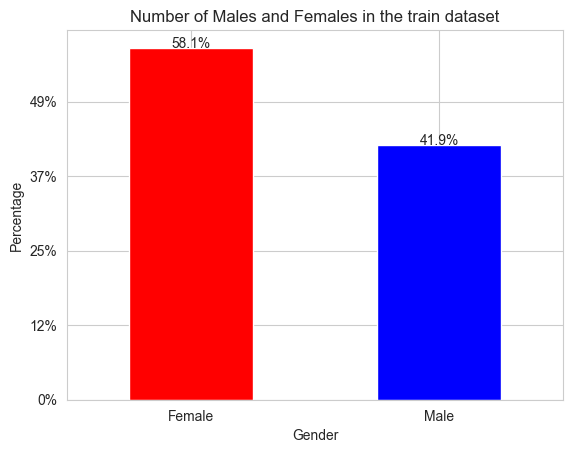

In [10]:
gender_counts = dataframe['Male'].value_counts()
ax = gender_counts.plot(kind='bar', color=['red', 'blue'])
plt.title('Number of Males and Females in the train dataset')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xticks(rotation=0)

total_count = gender_counts.sum()
for i, count in enumerate(gender_counts):
    pct = count / total_count * 100
    ax.text(i, count + 100, f'{pct:.1f}%', ha='center')

plt.gca().set_yticklabels(['{:.0f}%'.format((x / total_count) * 100) for x in plt.gca().get_yticks()])

plt.show()

/var/folders/fv/hdmdsw6s3fv_72w1tfp22w9m0000gn/T/ipykernel_53381/1427892911.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format((x / total_count) * 100) for x in plt.gca().get_yticks()])


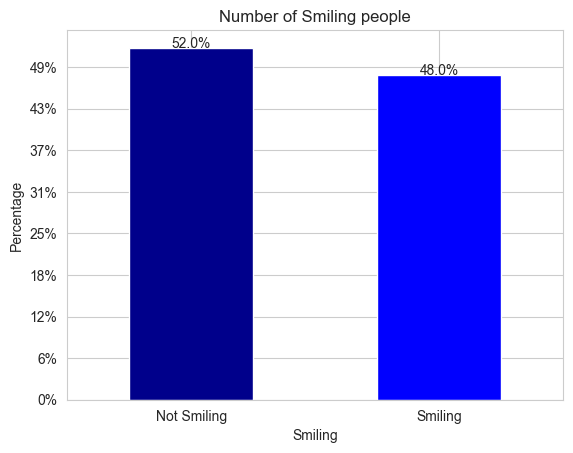

In [11]:
smiling_counts = dataframe['Smiling'].value_counts()
ax = smiling_counts.plot(kind='bar', color=['darkblue', 'blue'])
plt.title('Number of Smiling people')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Not Smiling', 'Smiling'])
plt.xticks(rotation=0)

total_count = smiling_counts.sum()
for i, count in enumerate(smiling_counts):
    pct = count / total_count * 100
    ax.text(i, count + 100, f'{pct:.1f}%', ha='center')

plt.gca().set_yticklabels(['{:.0f}%'.format((x / total_count) * 100) for x in plt.gca().get_yticks()])


plt.show()

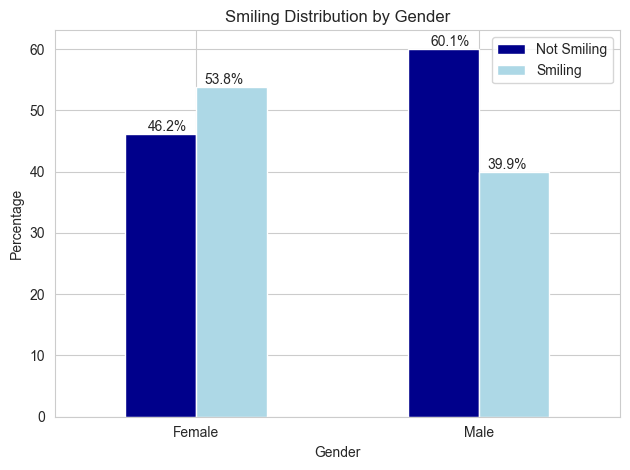

In [12]:
label_distribution = dataframe.groupby('Male')['Smiling'].value_counts(normalize=True) * 100
label_distribution = label_distribution.unstack()

ax = label_distribution.plot(kind='bar', color=['darkblue', 'lightblue'])
plt.title('Smiling Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(['Not Smiling', 'Smiling'], loc='upper right')

for i in range(len(label_distribution.index)):
    for j in range(len(label_distribution.columns)):
        plt.text(i + j * 0.2 - 0.1, label_distribution.iloc[i, j] + 0.5, f'{label_distribution.iloc[i, j]:.1f}%', ha='center')

#plt.legend(['Not Smiling', 'Smiling'], loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(1)


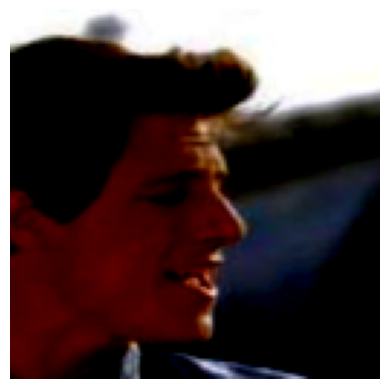

In [13]:
image_array = np.transpose(train_dataset[2][0], (1, 2, 0))
print(train_dataset[0][1])

plt.imshow(image_array)
plt.axis('off')  # Turn off axis
plt.show()

In [14]:
print(celeba_dataset.get_attribute_names())

['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


In [15]:
celeba_dataset.set_target_label("Smiling")
train_dataset, valid_dataset, test_dataset = celeba_dataset.get_datasets()

Updated target label. Selected label Smiling. Corresponding index: 31
Remember to rerequest the dataset


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0)


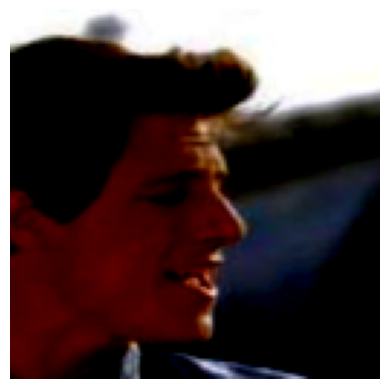

In [16]:
image_array = np.transpose(train_dataset[2][0], (1, 2, 0))
print(train_dataset[2][1])

plt.imshow(image_array)
plt.axis('off')  # Turn off axis
plt.show()

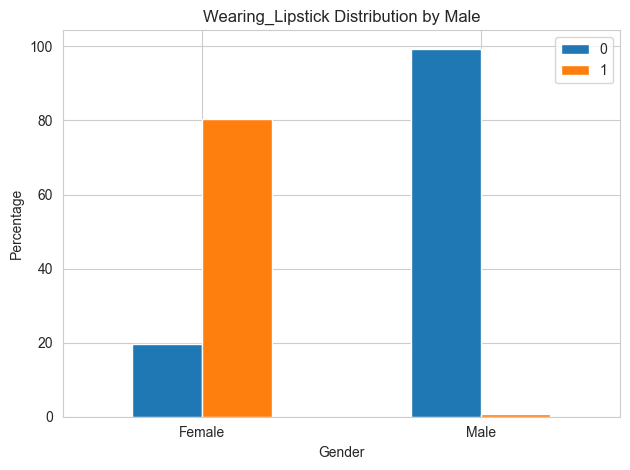

In [17]:
from jupyter_notebooks.dataset_analysis.dataset_analysis_utils import plot_protected_feature_distribution

plot_protected_feature_distribution(dataframe, "Wearing_Lipstick", "Male")

In [18]:
def plot_feature_distribution_ratio(df):
    features = []
    ratios = []

    for column in df.columns:
        # Count the number of samples for each class (0 and 1) for the current feature
        counts = df[column].value_counts(normalize=True)

        # Ensure both 0 and 1 are present in the value_counts, else fill with 0
        zero_count = counts.get(0, 0)
        one_count = counts.get(1, 0)

        # Calculate the ratio
        ratio = one_count / zero_count if zero_count != 0 else np.inf
        features.append(column)
        ratios.append(ratio)

    # Combine the features and ratios into a list of tuples and sort by ratio in descending order
    sorted_pairs = sorted(zip(features, ratios), key=lambda x: x[1], reverse=True)
    sorted_features, sorted_ratios = zip(*sorted_pairs)

    plt.figure(figsize=(20, 6))
    bars = plt.bar(sorted_features, sorted_ratios, color='skyblue')
    plt.xlabel('Features')
    plt.ylabel('Ratio of 1s to 0s')
    plt.title('Distribution Ratio of CelebA Features')
    plt.xticks(rotation=90)
    plt.yscale('log')  # Use a logarithmic scale for better visualization of large ratios
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add the exact values above the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

    plt.tight_layout()
    plt.savefig("dataset_plots/celeba_target_ratio.png", dpi=200)
    plt.show()

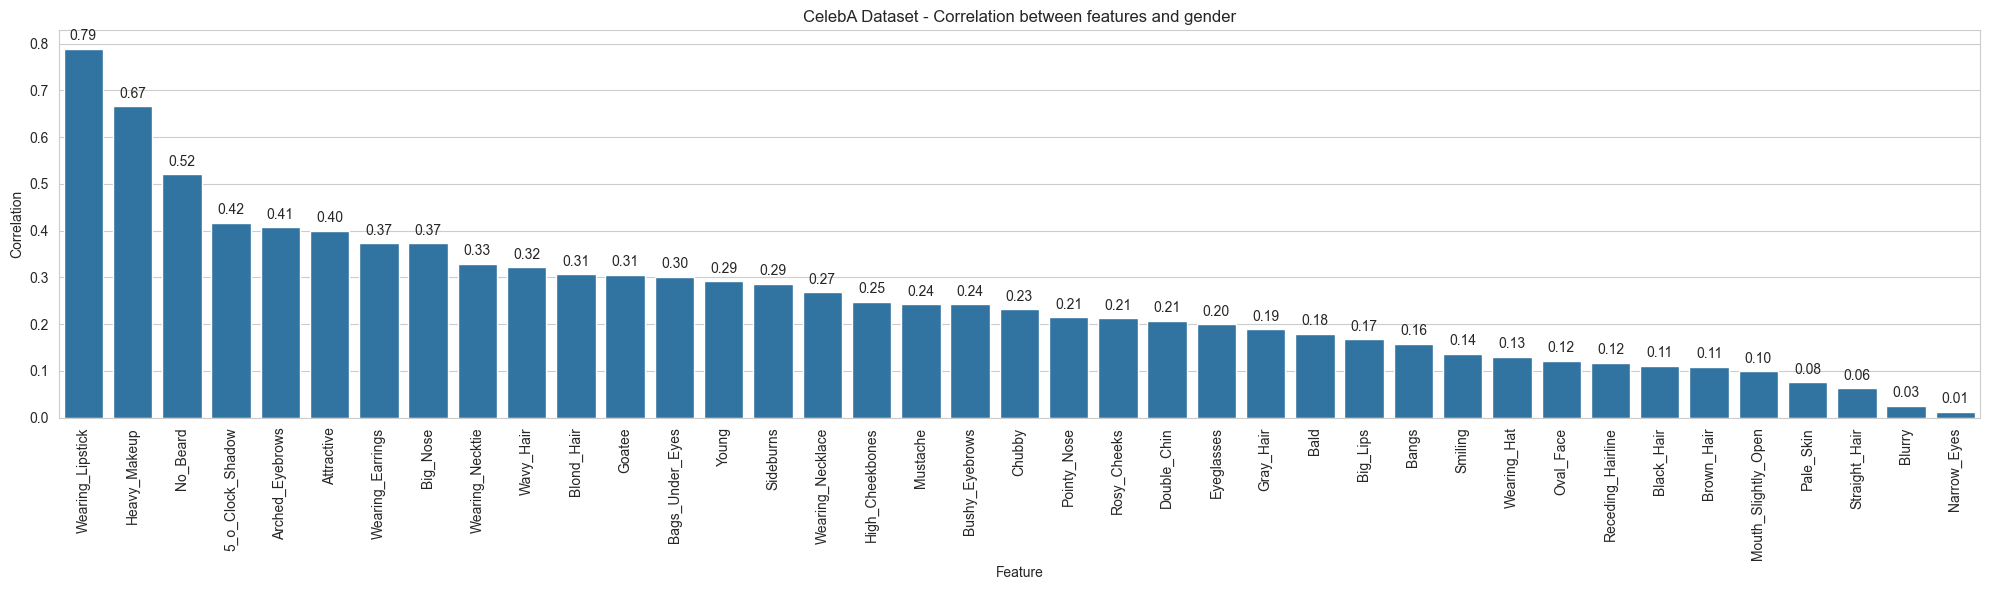

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, pearsonr

correlations = {}
for column in dataframe.columns:
    if column != 'Male':
        corr, _ = pearsonr(dataframe['Male'], dataframe[column])
        correlations[column] = abs(corr)

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

plt.figure(figsize=(20, 6))
barplot = sns.barplot(x='Feature', y='Correlation', data=correlation_df)
plt.title('CelebA Dataset - Correlation between features and gender')
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.ylabel('Correlation')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9), textcoords = 'offset points')

plt.tight_layout()
plt.savefig("dataset_plots/celeba_correlation.png", dpi=200)
plt.show()

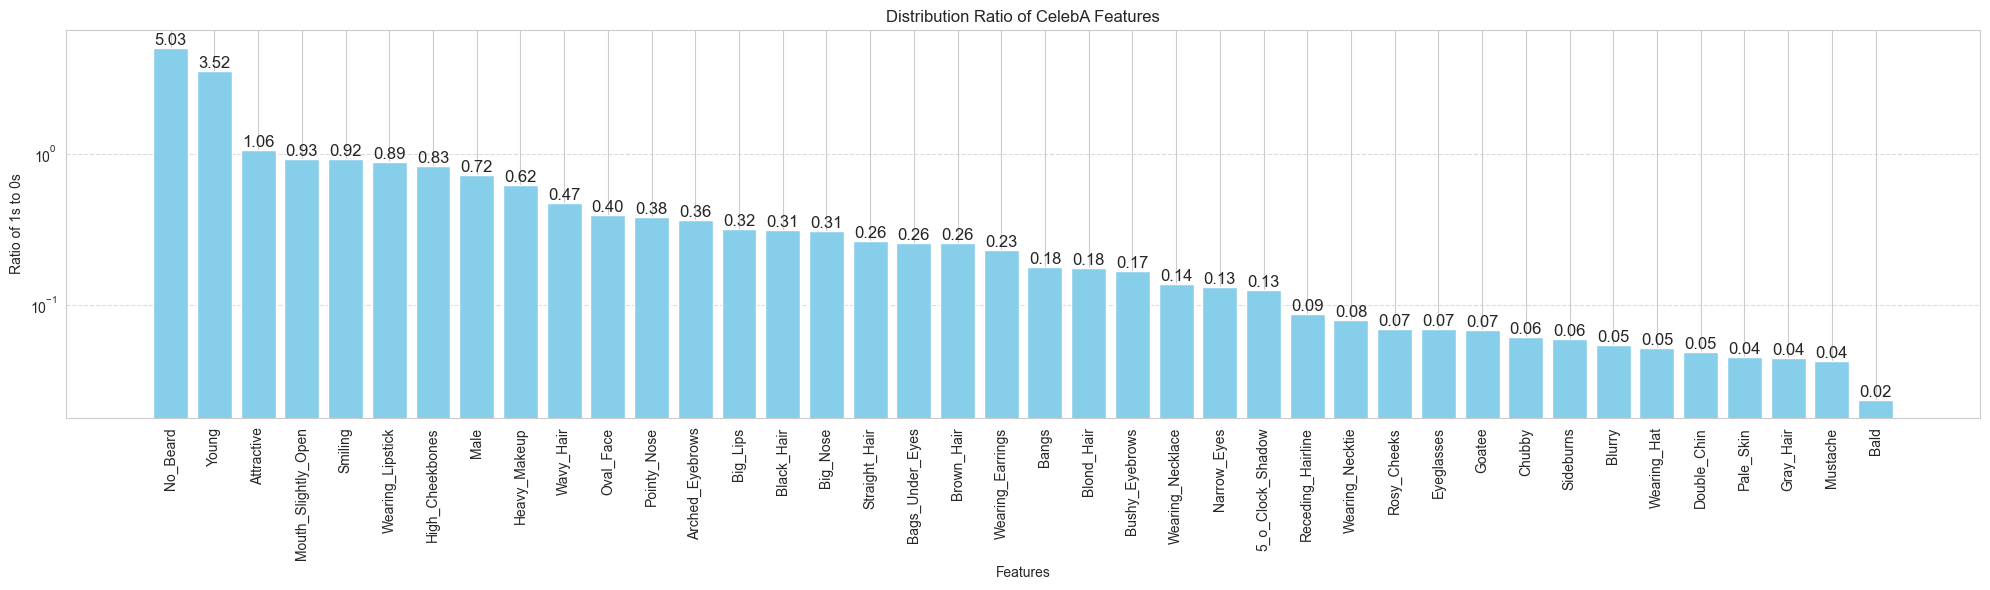

In [20]:
plot_feature_distribution_ratio(dataframe)

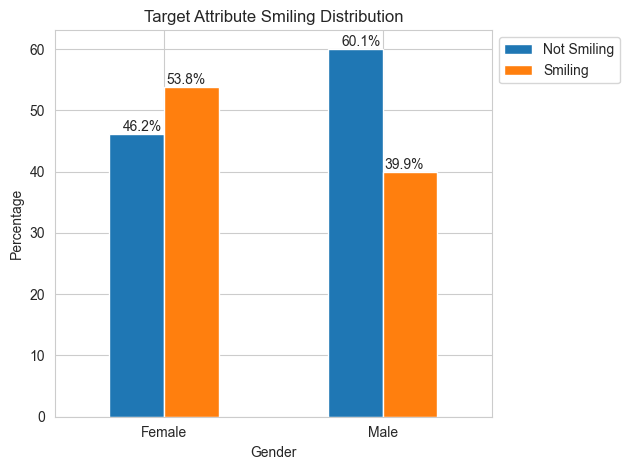

In [21]:
from jupyter_notebooks.dataset_analysis.dataset_analysis_utils import plot_protected_feature_distribution_binary

plot_protected_feature_distribution_binary(dataframe, "Smiling", "Male", title="Target Attribute Smiling Distribution", save_fig_path="celeba_target_smiling_gender_distribution")

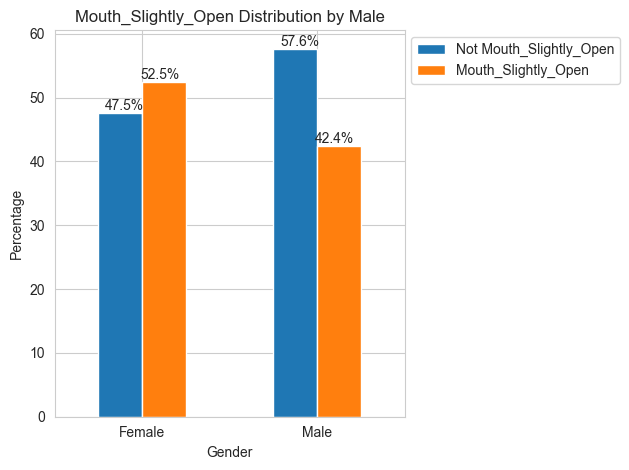

In [22]:
plot_protected_feature_distribution_binary(dataframe, "Mouth_Slightly_Open", "Male")

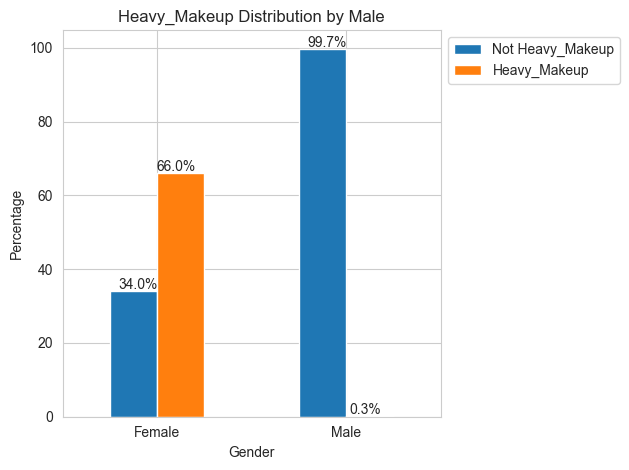

In [23]:
plot_protected_feature_distribution_binary(dataframe, "Heavy_Makeup", "Male")

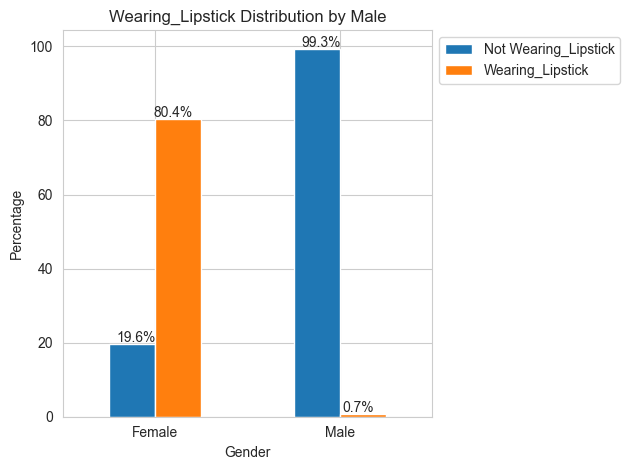

In [24]:
plot_protected_feature_distribution_binary(dataframe, "Wearing_Lipstick", "Male")